In [68]:
#statystyka

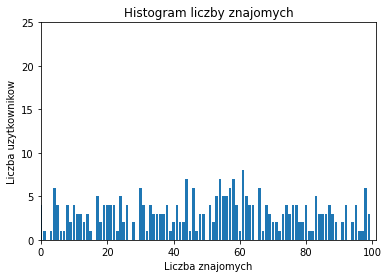

In [43]:
#przestawienie liczby znajomych na histogramie za pomoca funkcji counter i plt.bar

from collections import Counter
import matplotlib.pyplot as plt
from random import randrange, seed
from typing import List
seed(10)
num_friends = [randrange(0, 100) for _ in range(300)]
friend_counts = Counter(num_friends)

xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram liczby znajomych")
plt.xlabel("Liczba znajomych")
plt.ylabel("Liczba uzytkownikow")
plt.show()

In [44]:
#takie dane ciezko opisac podczas rozmowy, dlatego decydujemy się na obliczenie parametrów statystycznych

#podstawowy to liczba elementow zbioru

num_points = len(num_friends)
print(num_points)

#najnizsza i najwyzsza wartosc w zbiorze

largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)

#posortowane wartosci
sorted_values = sorted(num_friends)
smalles_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

300
99
0


In [45]:
#tendencje centralne

#obliczenie sredniej

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

50.126666666666665

In [46]:
#mediana

#podkreslenie w nazwie oznacza, ze jest to funkcja "prywatna"
#zakladamy, ze bedzie ona wywylywana tylko przez funkcje median,
#a nie bezposrednio przez uzytkownikow

def _median_odd(xs: List[float]) -> float:
    """jezeli len(xs) jest nieparzyste, to mediana jest srodkowym elementem"""
    return sorted(xs)[len(xs) // 2]
def _median_even(xs: List[float]) -> float:
    """jezeli len(xs) jest parzyste, to mediana jest srednia dwoch srodkowych elemenetow"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """zwraca mediane wektora v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2+9)/2


In [47]:
#mediana liczby znajomych
friends_median = median(num_friends)
friends_median

53.0

In [54]:
#kwantyle

#jest to ugolnienie mediany
#kwantyl reprezentuje wartosci mniejsze od tej, do ktorej nalezy okreslony percentyl danych
#dla zobrazwoania, mediana reprezentuje wartosc mniejsza od 50% danych

def quantile(xs: List[float], p: float) -> float:
    """Zwraca ze zbioru xs wartosc bedaca p-tym percentylem"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

#dla tego przykladu, jezeli mamy percentyl 0.1, tzn ze 10% danych jest mniejszych od wartosci 30


assert quantile(num_friends, 0.10) == 11

In [59]:
#dominanta

#jest to wartosc najczesciej wystepujaca w probie

def mode(x: List[float]) -> List[float]:
    """Zwraca liste, zbior moze zawierac wiecej niz jedna dominante"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]


assert set(mode(num_friends)) == {61}

In [63]:
#dyspersja

#dyspersja okresla rozrzut danych czyli roznica miedzy najwyzsza i najmniejsza wartoscia, zwana tez zakresem

def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)


assert data_range(num_friends) == 99

In [72]:
#wariancja

#bardziej zlozona miara rozrzutu

from scratch.linear_algebra import sum_of_squares
def de_mean(xs: List[float]) -> List[float]:
    """przeksztalca x poprzez odjecie sredniej"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Prawie jak srednie odchylenie kwadratowe od sredniej"""
    assert len(xs) >= 2, "wariancja wymaga co najmniej dwoch elementow"
    
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1)

variance(num_friends)


#https://www.statystyczny.pl/odchylenie-standardowe-z-proby/ - dobrze wytlumaczone dlaczego n-1

739.0340691192863

In [87]:
#odchylenie standardowe

import math
def standard_deviation(xs: List[float]) -> float:
    """odchylenie standardowe jest pierwiastkiem kwadratowym wariancji"""
    return math.sqrt(variance(xs))

In [88]:
#rozstep kwartylny - roznica pomiedzy kwantylem 0.25 a kwantylem 0.75 czyli pierwszym a trzecim kwartylem

def interquartile_range(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

#na te wartosc nie wplywa niewielka liczba elementow odstajacych 

# korelacja

In [92]:
#kowariancja
#jest to parametr zwiazany z wariancja

#wariancja okresla odchylenie pojedynczej zmiennej od sredniej, a kowariancja
#jak dwie zmienne roznica sie lacznie od swoich srednich

from scratch.linear_algebra import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs i ys musza miec taka sama liczbe elementow"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)    

In [93]:
#korelacja

def correlation(xs: List[float], ys: List[float]) -> float:
    """mierzy, jak bardzo xs i ys roznia sie lacznie od swoich srednich"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else: 
        return 0

In [94]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

outlier = num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends)
                   if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes)
                     if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [96]:
#korelacja dla blednych

bledne = correlation(num_friends, daily_minutes)
bledne

0.24736957366478218

In [97]:
#korelacja dla bezblednych

bezbledne = correlation(num_friends_good, daily_minutes_good)
bezbledne

0.5736792115665573

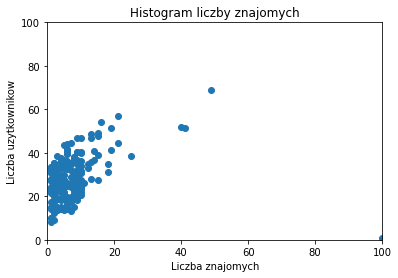

In [84]:
#graph 1

plt.scatter(num_friends, daily_minutes)
plt.axis([0, 100 , 0, 100])
plt.title("Histogram liczby znajomych")
plt.xlabel("Liczba znajomych")
plt.ylabel("Liczba uzytkownikow")
plt.show()

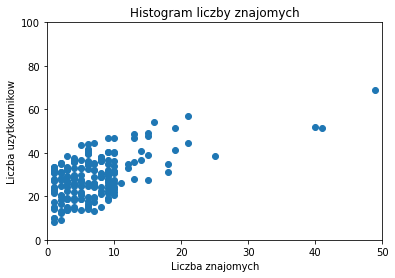

In [81]:
#graph 2

plt.scatter(num_friends_good, daily_minutes_good)
plt.axis([0, 50 , 0, 100])
plt.title("Histogram liczby znajomych")
plt.xlabel("Liczba znajomych")
plt.ylabel("Liczba uzytkownikow")
plt.show()